In [397]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

<h1>IMPORTING AND CLEANING THE DATA</h1>

In [398]:
# merging all csv files
files = [file for file in os.listdir('/Users/victoria/Desktop/Coding_Data/DataSets/sales/')]

sales = pd.DataFrame()

for file in files:
    df = pd.read_csv('/Users/victoria/Desktop/Coding_Data/DataSets/sales/' + file)
    sales = pd.concat([sales, df])


In [399]:
sales.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"


In [400]:
sales.shape

(186850, 6)

In [401]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186850 entries, 0 to 13621
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 10.0+ MB


In [402]:
sales.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [403]:
sales = sales.dropna()

In [404]:
sales.isnull().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

In [405]:
sales.describe(include=object)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
count,186305,186305,186305,186305,186305,186305
unique,178438,20,10,24,142396,140788
top,Order ID,USB-C Charging Cable,1,11.95,Order Date,Purchase Address
freq,355,21903,168552,21903,355,355


<p>We have column names slipping into rows.</p>

In [406]:
sales.shape

(186305, 6)

In [407]:
dupes = sales[sales.duplicated()].sort_values(['Order ID'])
dupes.to_csv('dupes.csv', index=False)

<p>Something interesting happens here. We have unique values that have duplicated index. The reason behid this could be merging, since we have exacly 12 duplicate index rows.</p>

In [408]:
sales.loc[0]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
0,150502,iPhone,1,700,02/18/19 01:35,"866 Spruce St, Portland, ME 04101"
0,162009,iPhone,1,700,03/28/19 20:59,"942 Church St, Austin, TX 73301"
0,236670,Wired Headphones,2,11.99,08/31/19 22:21,"359 Spruce St, Seattle, WA 98101"
0,194095,Wired Headphones,1,11.99,05/16/19 17:14,"669 2nd St, New York City, NY 10001"
0,278797,Wired Headphones,1,11.99,11/21/19 09:54,"46 Park St, New York City, NY 10001"
0,259358,34in Ultrawide Monitor,1,379.99,10/28/19 10:56,"609 Cherry St, Dallas, TX 75001"
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
0,248151,AA Batteries (4-pack),4,3.84,09/17/19 14:44,"380 North St, Los Angeles, CA 90001"


In [409]:
# reset index column
sales = sales.reset_index(drop=True)

In [410]:
# check if the index is reset
sales.loc[0]

Order ID                                            295665
Product                                 Macbook Pro Laptop
Quantity Ordered                                         1
Price Each                                            1700
Order Date                                  12/30/19 00:01
Purchase Address    136 Church St, New York City, NY 10001
Name: 0, dtype: object

In [411]:
# remove spaces in columns
sales.columns = ['Order_ID', 'Product', 'Quantity_Ordered', 'Price_Each', 'Order_Date', 'Purchase_Address']

In [412]:
# remove strings from numeric columns
sales = sales.query('Order_ID != "Order ID"')
sales.shape 

(185950, 6)

In [413]:
sales.describe(include=object)

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address
count,185950,185950,185950,185950,185950,185950
unique,178437,19,9,23,142395,140787
top,160873,USB-C Charging Cable,1,11.95,12/15/19 20:16,"193 Forest St, San Francisco, CA 94016"
freq,5,21903,168552,21903,8,9


<p>Almost perfect. There is still some duplication in Order ID column. Let's check and fix  if needed!</p>

In [414]:
dupe_ID = sales[sales.duplicated(subset='Order_ID')].sort_values('Order_ID')
dupe_ID

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address
137099,141275,Wired Headphones,1,11.99,01/07/19 16:06,"610 Walnut St, Austin, TX 73301"
137115,141290,AA Batteries (4-pack),3,3.84,01/02/19 08:25,"4 1st St, Los Angeles, CA 90001"
137191,141365,Wired Headphones,1,11.99,01/10/19 11:19,"20 Dogwood St, New York City, NY 10001"
137211,141384,USB-C Charging Cable,1,11.95,01/03/19 00:14,"223 Jackson St, Boston, MA 02215"
137278,141450,Bose SoundSport Headphones,1,99.99,01/12/19 11:16,"521 Park St, San Francisco, CA 94016"
...,...,...,...,...,...,...
24898,319536,Wired Headphones,1,11.99,12/16/19 09:59,"346 Elm St, Seattle, WA 98101"
24919,319556,Wired Headphones,1,11.99,12/22/19 08:23,"848 7th St, Austin, TX 73301"
24948,319584,Wired Headphones,1,11.99,12/11/19 00:30,"537 Sunset St, Portland, OR 97035"
24961,319596,Lightning Charging Cable,1,14.95,12/01/19 08:44,"436 14th St, New York City, NY 10001"


In [415]:
sales.query('Order_ID == "317971"')

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address
23273,317971,AA Batteries (4-pack),1,3.84,12/17/19 18:39,"250 Chestnut St, San Francisco, CA 94016"
23274,317971,AA Batteries (4-pack),1,3.84,12/17/19 18:39,"250 Chestnut St, San Francisco, CA 94016"


<p>These are indeed true duplicate values. Let's remove them.</p>

In [416]:
sales = sales.drop_duplicates()
sales.describe(include=object)

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address
count,185686,185686,185686,185686,185686,185686
unique,178437,19,9,23,142395,140787
top,160873,USB-C Charging Cable,1,11.95,12/15/19 20:16,"193 Forest St, San Francisco, CA 94016"
freq,5,21859,168291,21859,8,9


In [417]:
sales.shape

(185686, 6)

<p>We can still see that out of 185950 the 178437 are unique order ID. But these are not duplicates! These are Order IDs that include multiple items per purchase (as seen below). Therefore, we will definately leave this in the data frame.</p>

In [418]:
duplicate_ID = sales[sales.duplicated(subset='Order_ID', keep=False)]
print(duplicate_ID)

       Order_ID                     Product Quantity_Ordered Price_Each  \
16       295681                Google Phone                1        600   
17       295681        USB-C Charging Cable                1      11.95   
18       295681  Bose SoundSport Headphones                1      99.99   
19       295681            Wired Headphones                1      11.99   
36       295698             Vareebadd Phone                1        400   
...         ...                         ...              ...        ...   
186275   222882       AA Batteries (4-pack)                1       3.84   
186277   222884                Google Phone                1        600   
186278   222884        USB-C Charging Cable                1      11.95   
186297   222903                      iPhone                1        700   
186298   222903    Lightning Charging Cable                1      14.95   

            Order_Date                         Purchase_Address  
16      12/25/19 12:37           

<p>What we are working with: <b>185686</b> rows and <b>6</b> columns.
</p>

In [419]:
sales.dtypes

Order_ID            object
Product             object
Quantity_Ordered    object
Price_Each          object
Order_Date          object
Purchase_Address    object
dtype: object

In [420]:
# convert to numeric data types. I did not convert 'Order_ID' to numeric because of Data Integrity and in this case unknown database compatibility 
sales['Quantity_Ordered'] = sales['Quantity_Ordered'].astype(int)
sales['Price_Each'] = sales['Price_Each'].astype(float)
sales.dtypes

Order_ID             object
Product              object
Quantity_Ordered      int64
Price_Each          float64
Order_Date           object
Purchase_Address     object
dtype: object

In [421]:
# date/time column
from datetime import datetime
sales.Order_Date = pd.to_datetime(sales.Order_Date, format='%m/%d/%y %H:%M')


In [422]:
sales[['Street', 'City', 'State_Postcode']] = sales.Purchase_Address.str.split(',', expand=True)

In [423]:
sales.head(5)

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address,Street,City,State_Postcode
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",136 Church St,New York City,NY 10001
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",562 2nd St,New York City,NY 10001
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",277 Main St,New York City,NY 10001
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",410 6th St,San Francisco,CA 94016
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",43 Hill St,Atlanta,GA 30301


In [424]:
sales['State'] = sales.State_Postcode.str[:3]
sales['Postcode'] = sales.State_Postcode.str[3:9]

In [425]:
sales = sales.drop(columns=['Purchase_Address', 'State_Postcode'])

In [426]:
sales.dtypes

Order_ID                    object
Product                     object
Quantity_Ordered             int64
Price_Each                 float64
Order_Date          datetime64[ns]
Street                      object
City                        object
State                       object
Postcode                    object
dtype: object

In [427]:
sales.head(5)

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Street,City,State,Postcode
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,136 Church St,New York City,NY,10001
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,562 2nd St,New York City,NY,10001
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,277 Main St,New York City,NY,10001
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,410 6th St,San Francisco,CA,94016
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,43 Hill St,Atlanta,GA,30301


<p> Now we can begin the analysis. </p>

<h1> EDA </h1>

In [471]:
# there is only a day worth of data for 2020. Let's create a yearly report for the year 2019.
sales.Year = sales.Order_Date.dt.year
sales_2019 = sales.query('Order_Date.dt.year != 2020').copy()

In [429]:
product_list = sales_2019.query('~Product.duplicated()')[['Product', 'Price_Each']]
product_list.sort_values(by='Price_Each', ascending=False)

,Product,Price_Each
0,Macbook Pro Laptop,1700.00
11,ThinkPad Laptop,999.99
54,iPhone,700.00
1,LG Washing Machine,600.00
16,Google Phone,600.00
747,LG Dryer,600.00
36,Vareebadd Phone,400.00
143,27in 4K Gaming Monitor,389.99
61,34in Ultrawide Monitor,379.99
89,Flatscreen TV,300.00


<h2> Product popularity and revenue </h2>

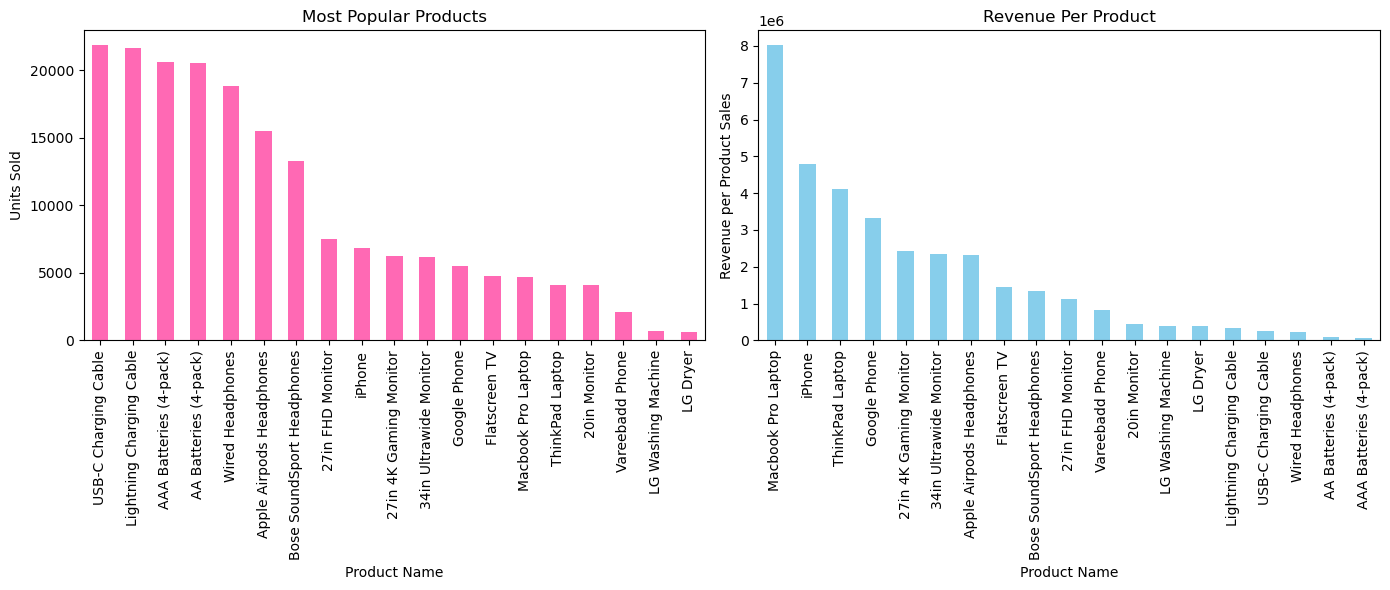

In [461]:
most_popular_products = sales_2019.groupby('Product')['Product'].count().sort_values(ascending=False)

# figure with two subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# most popular products plot
most_popular_products.plot(kind='bar', color='hotpink', label='Other', ax=ax1)

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Units Sold')
ax1.set_title('Most Popular Products')

# revenue per product plot
most_revenue_per_product = sales_2019.groupby('Product')['Price_Each'].sum().sort_values(ascending=False)
most_revenue_per_product.plot(kind='bar', color='skyblue', label='Other', ax=ax2)

ax2.set_xlabel('Product Name')
ax2.set_ylabel('Revenue per Product Sales')
ax2.set_title('Revenue Per Product')


plt.tight_layout()
plt.show()



<h2> Orders per City and State </h2>

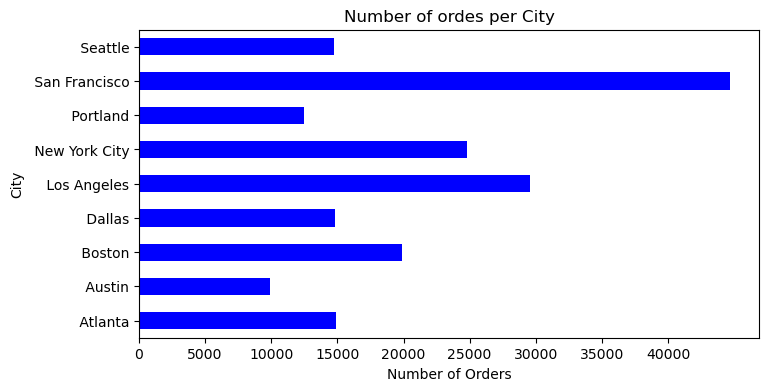

In [431]:
orders_per_city = sales_2019.groupby('City')['Order_ID'].count()

# horizontal bar plot
plt.figure(figsize=(8,4))

ax3 = orders_per_city.plot(kind='barh', color='blue')
ax3.set_xlabel('Number of Orders')
ax3.set_ylabel('City')

plt.xticks(range(0, orders_per_city.max() +1, 5000))
plt.title('Number of ordes per City')


plt.show()

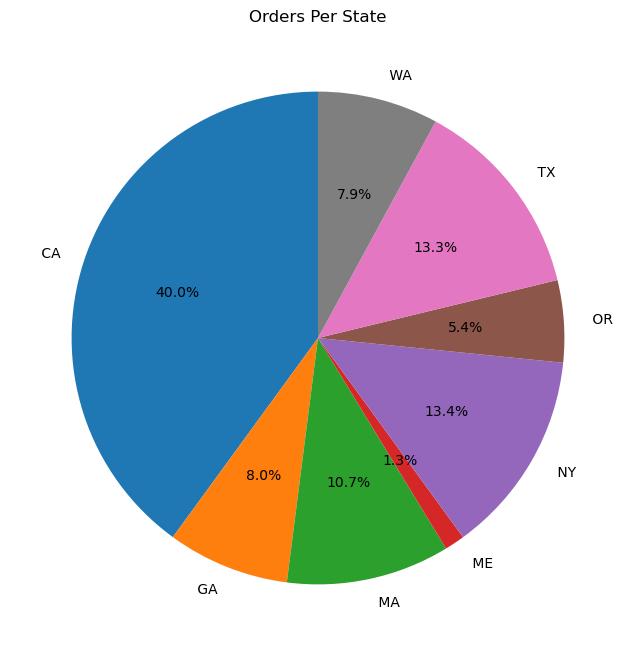

In [432]:
orders_per_state = sales_2019.groupby('State')['Order_ID'].count()

# pie chart
plt.figure(figsize=(8, 8))

plt.pie(orders_per_state, labels=orders_per_state.index, autopct='%1.1f%%', startangle=90)
plt.title('Orders Per State')


plt.show()

<h2> Revenue per City and State </h2>

In [433]:
revenue_sum = sales_2019.Price_Each.sum() 
revenue_sum

34254139.07

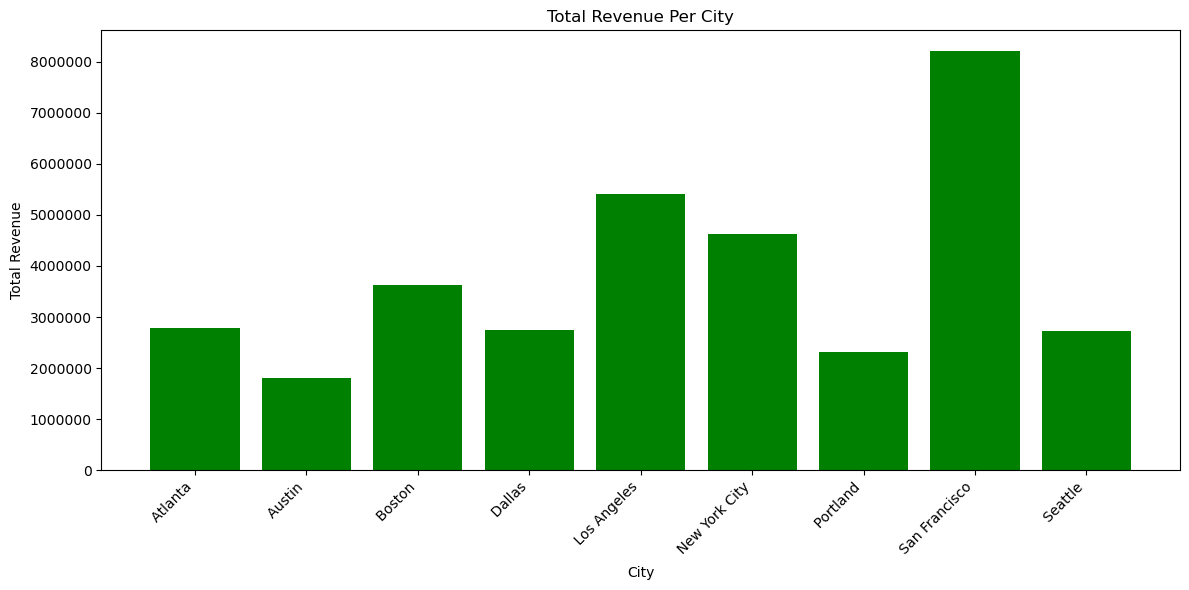

In [434]:
rev_per_city = sales_2019.groupby('City')['Price_Each'].sum()

# bar chart
plt.figure(figsize=(12, 6))
plt.bar(rev_per_city.index, rev_per_city.values, color='green')

plt.xlabel('City')
plt.ylabel('Total Revenue')
plt.title('Total Revenue Per City')
plt.ticklabel_format(style='plain', axis='y')
plt.xticks(rotation=45, ha='right')


plt.tight_layout()
plt.show()

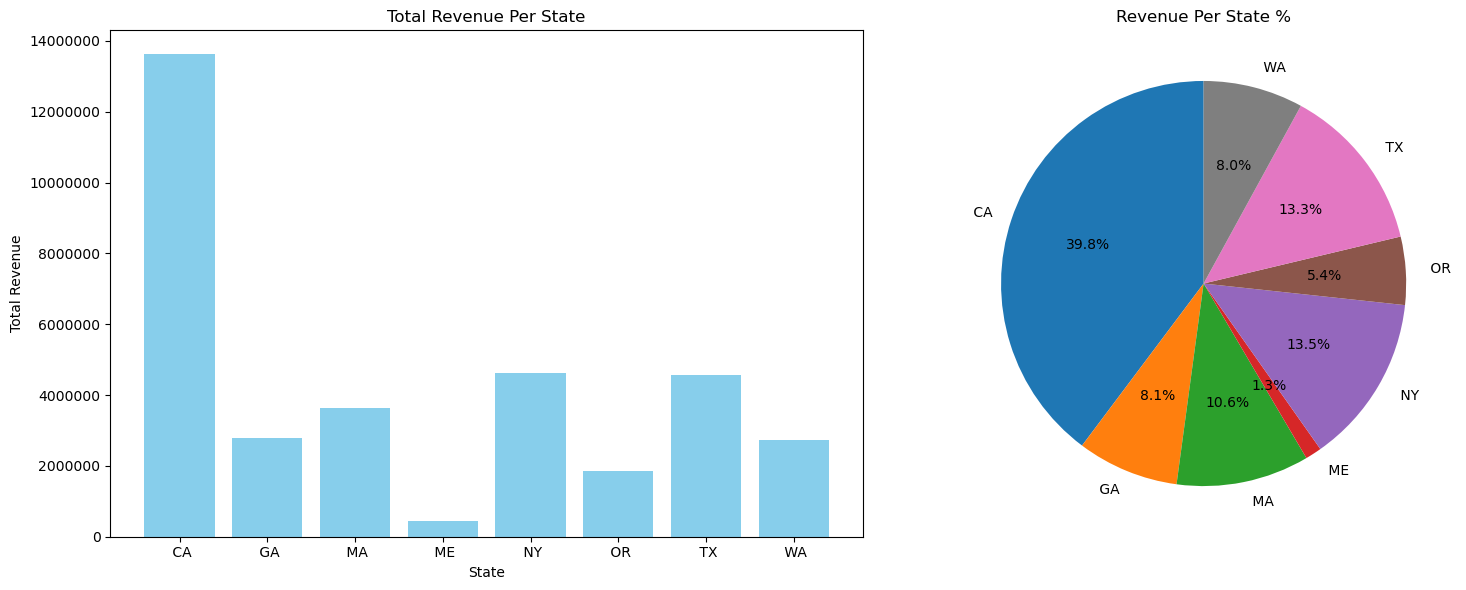

In [478]:
rev_per_state = sales_2019.groupby('State')['Price_Each'].sum()

# figure with two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# bar chart on the first subplot (axes[0])
axes[0].bar(rev_per_state.index, rev_per_state.values, color='skyblue')

axes[0].set_xlabel('State')
axes[0].set_ylabel('Total Revenue')
axes[0].set_title('Total Revenue Per State')
axes[0].ticklabel_format(style='plain', axis='y')


# pie chart on the second subplot (axes[1])
axes[1].pie(rev_per_state, labels=rev_per_state.index, autopct='%1.1f%%', startangle=90)
axes[1].set_title('Revenue Per State %')


plt.tight_layout()
plt.show()

In [480]:
revenue = sales_2019.Price_Each.sum()
revenue

34254139.07

<h2> Orders per month and best revenue day</h2>

In [436]:
# date with the maximum revenue
max_sales = sales_2019.groupby(sales_2019['Order_Date'].dt.date)['Price_Each'].sum().idxmax()

# count of orders made and total revenue for that date
max_sales_info = sales_2019[sales_2019['Order_Date'].dt.date == max_sales]
orders_count = max_sales_info['Order_ID'].nunique()
total_revenue = max_sales_info['Price_Each'].sum()

# results
print("Maximum Revenue Date:", max_sales)
print("Count of Orders on Maximum Revenue Date:", orders_count)
print("Revenue on Maximum Revenue Date:", total_revenue.round(2), '$')

Maximum Revenue Date: 2019-12-04
Count of Orders on Maximum Revenue Date: 758
Revenue on Maximum Revenue Date: 165827.89 $


In [440]:
rev_per_month = sales_2019.groupby(sales_2019['Order_Date'].dt.month)[['Price_Each']].sum()

# percentage monthy change
rev_per_month['Percentage_Change'] = (rev_per_month['Price_Each'].pct_change() * 100).round(2)
rev_per_month['Difference'] = rev_per_month['Price_Each'].diff()


rev_per_month.head(12)

,Price_Each,Percentage_Change,Difference
Order_Date,,,
1,1802421.41,NaN,NaN
2,2186940.38,21.33,384518.97
3,2789084.64,27.53,602144.26
4,3366218.76,20.69,577134.12
5,3133134.61,-6.92,-233084.15
6,2560503.50,-18.28,-572631.11
7,2631225.12,2.76,70721.62
8,2226963.90,-15.36,-404261.22
9,2081897.65,-6.51,-145066.25


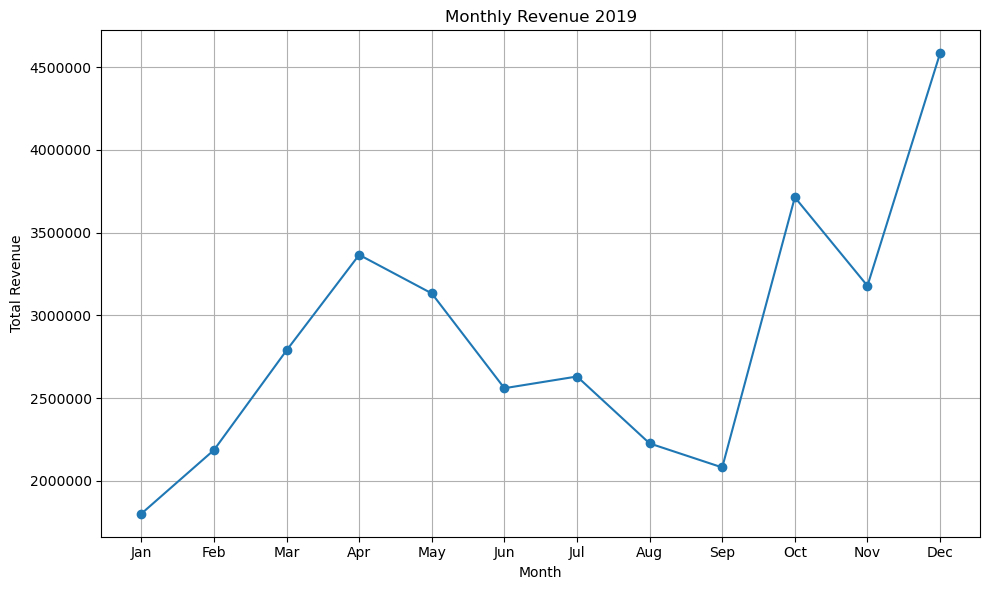

In [ ]:
# line plot
plt.figure(figsize=(10, 6))
plt.plot(rev_per_month.index, rev_per_month['Price_Each'], marker='o', linestyle='-')

plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.ticklabel_format(style='plain', axis='y')
plt.title('Monthly Revenue 2019')

# x-axis labels to display month names
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.xticks(rev_per_month.index, months)

plt.grid(True)


plt.tight_layout()
plt.show()

<h2>What time should we display advertisemens to maximize the likelihood of customer’s buying product?</h2>

In [455]:
product_buy_per_hour = sales_2019.groupby(sales_2019['Order_Date'].dt.hour)[['Order_ID']].count()

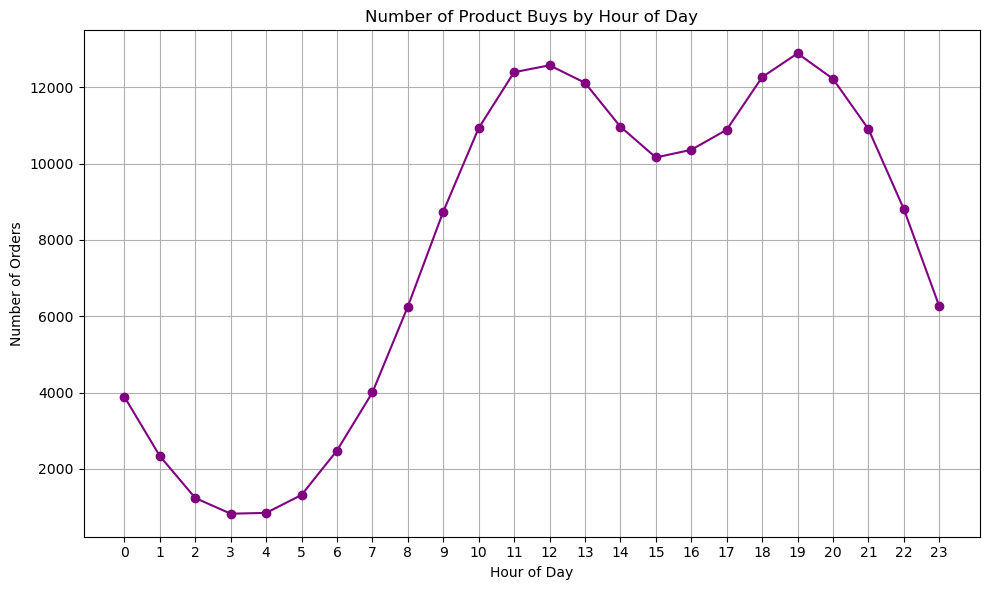

In [460]:
# line plot
plt.figure(figsize=(10, 6))
plt.plot(product_buy_per_hour.index, product_buy_per_hour.values, marker='o', linestyle='-', color='purple')

plt.xlabel('Hour of Day')
plt.ylabel('Number of Orders')
plt.title('Number of Product Buys by Hour of Day')

# show 24 hours on the x-axis
plt.xticks(product_buy_per_hour.index, product_buy_per_hour.index)

plt.grid(True)


plt.tight_layout()
plt.show()

<p> We see two peek sales time-windows: 11:00 - 13:00 and 18:00 - 20:00.</p>

<h2>What products are most often sold together?</h2>


In [468]:
bundles = sales_2019[sales_2019['Order_ID'].duplicated().copy()]
bundles

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Street,City,State,Postcode
17,295681,USB-C Charging Cable,1,11.95,2019-12-25 12:37:00,79 Elm St,Boston,MA,02215
18,295681,Bose SoundSport Headphones,1,99.99,2019-12-25 12:37:00,79 Elm St,Boston,MA,02215
19,295681,Wired Headphones,1,11.99,2019-12-25 12:37:00,79 Elm St,Boston,MA,02215
37,295698,USB-C Charging Cable,2,11.95,2019-12-13 14:32:00,175 1st St,New York City,NY,10001
43,295703,Bose SoundSport Headphones,1,99.99,2019-12-17 12:27:00,502 Jefferson St,Austin,TX,73301
...,...,...,...,...,...,...,...,...,...
186254,222863,Bose SoundSport Headphones,1,99.99,2019-06-07 11:05:00,222 Walnut St,Austin,TX,73301
186260,222868,Apple Airpods Headphones,1,150.00,2019-06-16 13:53:00,505 North St,New York City,NY,10001
186275,222882,AA Batteries (4-pack),1,3.84,2019-06-18 11:37:00,990 Walnut St,Los Angeles,CA,90001
186278,222884,USB-C Charging Cable,1,11.95,2019-06-04 12:06:00,819 Pine St,New York City,NY,10001


In [469]:
from itertools import combinations
from collections import Counter

### 1. itertools.combinations

**Function Signature:** `itertools.combinations(iterable, r)`

- `iterable`: An iterable (e.g., a list or tuple) from which to generate combinations.
- `r`: An integer that specifies the length of the combinations to generate.

**Description:**

`itertools.combinations` is a function from the `itertools` module in Python's standard library. It returns an iterator that generates all possible combinations of elements from the given iterable of a specified length `r`.

- The elements in each combination are in sorted order, and the combinations themselves are produced in lexicographic order.

---

### 2. collections.Counter

**Function Signature:** `collections.Counter(iterable_or_mapping)`

- `iterable_or_mapping`: An iterable (e.g., a list or tuple) or a mapping (e.g., a dictionary) to count elements from.

**Description:**

`collections.Counter` is a class from the `collections` module in Python's standard library. It is used for counting the occurrences of elements in an iterable or mapping. It returns a dictionary-like object with elements as keys and their counts as values.

- It provides methods for arithmetic operations (e.g., addition, subtraction) on counters.
- Elements with zero or negative counts are omitted from the result.


In [470]:
product_combos = []

# iterating through each group of dplicated orders
for Order_ID, group in bundles.groupby('Order_ID'):
    products_in_order = group['Product'].tolist()

# find all possible combinations of 2 products in the order
    two_product_combos = list(combinations(products_in_order, 2))
    product_combos.extend(two_product_combos)

# extend the list of product combinations
product_combos_count = Counter(product_combos)

# find the most common product combinations
most_common_combo = product_combos_count.most_common()

# display the top N most common combinations
N = 10
for combination, count in most_common_combo[:N]:
    print(f"Combination: {combination}, Count: {count}")

Combination: ('USB-C Charging Cable', 'Wired Headphones'), Count: 119
Combination: ('Lightning Charging Cable', 'Wired Headphones'), Count: 62
Combination: ('USB-C Charging Cable', 'Bose SoundSport Headphones'), Count: 51
Combination: ('Lightning Charging Cable', 'Apple Airpods Headphones'), Count: 47
Combination: ('Bose SoundSport Headphones', 'Wired Headphones'), Count: 29
Combination: ('Apple Airpods Headphones', 'Wired Headphones'), Count: 27
Combination: ('USB-C Charging Cable', 'AA Batteries (4-pack)'), Count: 3
Combination: ('USB-C Charging Cable', 'Apple Airpods Headphones'), Count: 3
Combination: ('USB-C Charging Cable', 'AAA Batteries (4-pack)'), Count: 3
Combination: ('Wired Headphones', 'AA Batteries (4-pack)'), Count: 3


<p>Most offten sold product in combination with another are Wired Headphones.</p>